# Superstore Data Analysis – Part 1

In this tutorial, we will perform data analysis on the [Superstore dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data).

This dataset contains detailed information for each transaction, including customer, date, location, product name, sales, profit, discount, and more. With so many variables, it's neither practical nor necessary to analyze everything — analysts typically explore data based on specific business questions or objectives (e.g., "What product categories are most profitable?" or "Which regions underperform in sales?").

There are many things worth analyzing in this dataset. You can explore individual variables (like `Sales` or `Category`) or combinations (such as `Region` vs. `Profitability`, or `Product Type` vs. `Discount`).

In this notebook, we’ll focus on:
- Basic analysis of **geographical areas**, **customers**, and **products**, and their relationships with **sales**, **profit**, and **profitability**.

In the next notebook, we’ll go deeper into **time series analysis**.

---

**Acknowledgements:**  
I learned a lot from the work of [Tetsuya Sasaki](https://www.kaggle.com/code/sasakitetsuya/data-analysis-for-marketing-strategy) and [Vivek Chowdhury](https://www.kaggle.com/code/vivek468/superstore-data-analysis).


# -Importing and Data Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [7]:
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

In [8]:
df['Profitability']=df['Profit']/df['Sales']

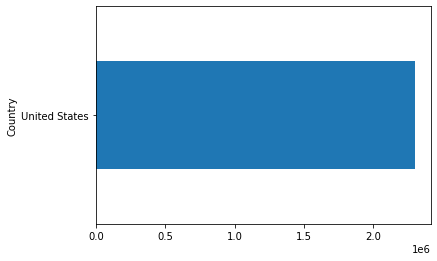

In [9]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh();

# All the data are in the United States.

# Overall sales,profit and profitability

In [10]:
# Avoid division by zero by replacing 0 sales with NaN for profitability
df_clean = df.copy()
df_clean['Profitability'] = df_clean['Profit'] / df_clean['Sales']
df_clean['Profitability'] = df_clean['Profitability'].replace([float('inf'), -float('inf')], pd.NA)

# Calculate averages (means)
avg_sales = df_clean['Sales'].mean()
avg_profit = df_clean['Profit'].mean()
overall_profitability = df_clean['Profit'].sum() / df_clean['Sales'].sum()  # aggregate-level profitability

# Calculate medians
median_sales = df_clean['Sales'].median()
median_profit = df_clean['Profit'].median()
median_profitability = df_clean['Profitability'].median()

# Display the results
print("📊 Averages for Entire Dataset:")
print(f"Average Sales:        ${avg_sales:.2f}")
print(f"Average Profit:       ${avg_profit:.2f}")
print(f"Overall Profitability: {overall_profitability:.3f}")

print("\n📈 Medians for Entire Dataset:")
print(f"Median Sales:         ${median_sales:.2f}")
print(f"Median Profit:        ${median_profit:.2f}")
print(f"Median Profitability: {median_profitability:.3f}")


📊 Averages for Entire Dataset:
Average Sales:        $229.86
Average Profit:       $28.66
Overall Profitability: 0.125

📈 Medians for Entire Dataset:
Median Sales:         $54.49
Median Profit:        $8.67
Median Profitability: 0.270


# The overall profit is positives,the store is operating profitably

# -Top 20 states by sales

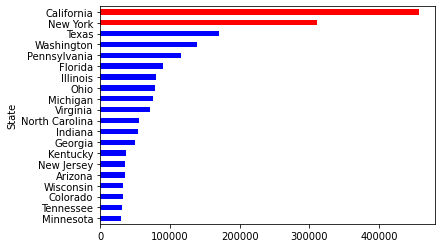

In [11]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 20 states by profit

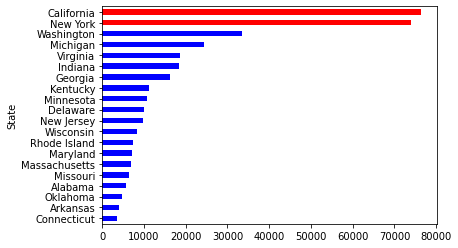

In [12]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# - Are there any difference among states in profitability ?

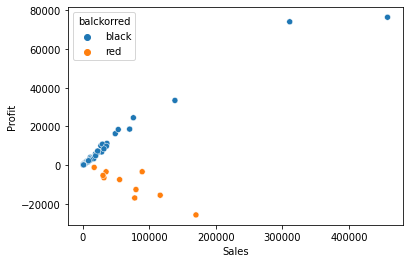

In [13]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_state.loc[:,'balckorred']=df_state.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_state, hue='balckorred',x='Sales',y='Profit');

# We can divide states to 'Black States'(+proift) and 'Red States'(-profit).

# -Top 20 cities by Sales

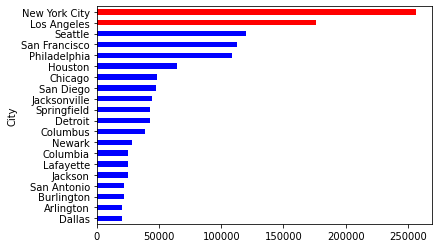

In [14]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 20 cities by Profit

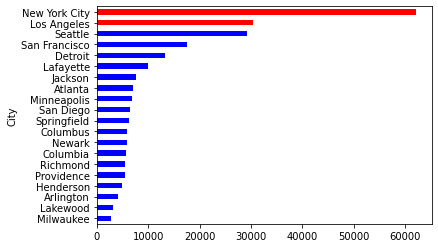

In [15]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

In [16]:
# Avoid division by zero by replacing 0 sales with NaN for profitability
df_clean = df.copy()
df_clean['Profitability'] = df_clean['Profit'] / df_clean['Sales']
df_clean['Profitability'] = df_clean['Profitability'].replace([float('inf'), -float('inf')], pd.NA)

# Calculate averages (means)
avg_sales = df_clean['Sales'].mean()
avg_profit = df_clean['Profit'].mean()
overall_profitability = df_clean['Profit'].sum() / df_clean['Sales'].sum()  # aggregate-level profitability

# Calculate medians
median_sales = df_clean['Sales'].median()
median_profit = df_clean['Profit'].median()
median_profitability = df_clean['Profitability'].median()

# Display the results
print("📊 Averages for Entire Dataset:")
print(f"Average Sales:        ${avg_sales:.2f}")
print(f"Average Profit:       ${avg_profit:.2f}")
print(f"Overall Profitability: {overall_profitability:.3f}")

print("\n📈 Medians for Entire Dataset:")
print(f"Median Sales:         ${median_sales:.2f}")
print(f"Median Profit:        ${median_profit:.2f}")
print(f"Median Profitability: {median_profitability:.3f}")


📊 Averages for Entire Dataset:
Average Sales:        $229.86
Average Profit:       $28.66
Overall Profitability: 0.125

📈 Medians for Entire Dataset:
Median Sales:         $54.49
Median Profit:        $8.67
Median Profitability: 0.270


# Most and least profitable cities

In [17]:


# Calculate total sales and profit per city
city_group = df.groupby('City')[['Sales', 'Profit']].sum()

# Calculate profitability
city_group['Profitability'] = city_group['Profit'] / city_group['Sales']

# Drop cities with zero sales to avoid division by zero
city_group = city_group[city_group['Sales'] > 0]

# Sort by profitability
city_sorted = city_group.sort_values('Profitability', ascending=False)

# Display top 10
top_10 = city_sorted.head(10)

# Display bottom 10
bottom_10 = city_sorted.tail(10)

print("🔝 Top 10 Cities by Profitability:")
print(top_10[['Sales', 'Profit', 'Profitability']])

print("\n🔻 Bottom 10 Cities by Profitability:")
print(bottom_10[['Sales', 'Profit', 'Profitability']])


🔝 Top 10 Cities by Profitability:
                Sales    Profit  Profitability
City                                          
Atlantic City   23.36   11.6800       0.500000
Grand Island    15.96    7.9800       0.500000
New Brunswick   14.77    7.1567       0.484543
Summerville    406.94  196.9132       0.483888
Holland        137.86   66.6588       0.483525
Lindenhurst     55.48   26.6304       0.480000
Antioch         19.44    9.3312       0.480000
Royal Oak       35.34   16.9632       0.480000
Davis           32.40   15.5520       0.480000
Bozeman         43.66   20.8106       0.476651

🔻 Bottom 10 Cities by Profitability:
                  Sales    Profit  Profitability
City                                            
Waco           606.1072 -520.1034      -0.858105
Champaign      151.9600 -182.3520      -1.200000
Tyler          347.2060 -443.7086      -1.277940
Littleton       72.2940  -98.8018      -1.366667
Deer Park        6.9240  -10.3860      -1.500000
Missouri City    6.37

# Compare sales and profit per customer


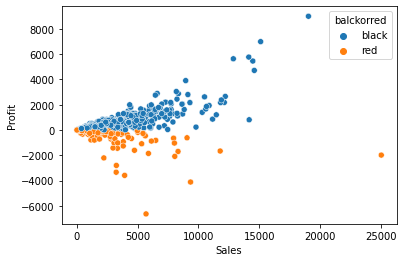

In [18]:
df_customer=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_customer.loc[:,'balckorred']=df_customer.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_customer, hue='balckorred',x='Sales',y='Profit');

# What can we deduce from this?

The outliers

# -Top 20 customers by Sales

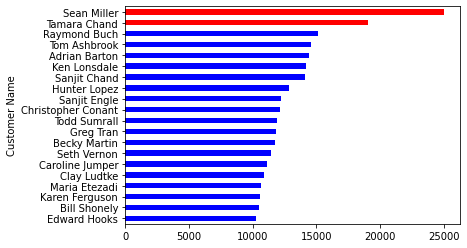

In [19]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

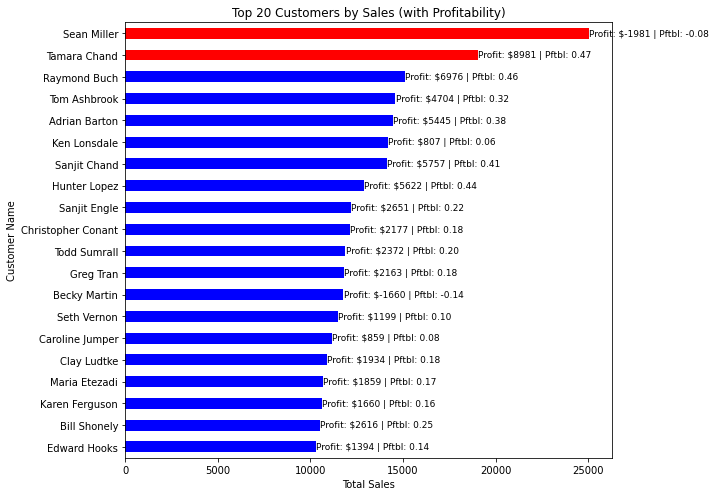

In [20]:

import matplotlib.pyplot as plt

# Step 1: Group by Customer Name and compute totals
customer_metrics = df.groupby('Customer Name')[['Sales', 'Profit']].sum()

# Step 2: Calculate profitability
customer_metrics['Profitability'] = customer_metrics['Profit'] / customer_metrics['Sales']

# Step 3: Sort by Sales and get top 20
top_20_customers = customer_metrics.sort_values('Sales', ascending=True).tail(20)

# Step 4: Plot with custom color list
colors = ['blue'] * 18 + ['red'] * 2

# Step 5: Plot Sales bar chart with color
ax = top_20_customers['Sales'].plot(kind='barh', color=colors, figsize=(10, 7))
plt.title("Top 20 Customers by Sales (with Profitability)")
plt.xlabel("Total Sales")

# Step 6: Annotate bars with Profit and Profitability
for i, (index, row) in enumerate(top_20_customers.iterrows()):
    ax.text(row['Sales'] + 10, i, f"Profit: ${row['Profit']:.0f} | Pftbl: {row['Profitability']:.2f}",
            va='center', fontsize=9)

plt.tight_layout()
plt.show()


# Note that the first customer, Sean Miller, contributes the highest sales but has a significant negative profit!
# It's important to address this and turn it into a positive.

# -Can we apply Pareto principle to customers and Sales ?

In [21]:
df1=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))

In [22]:
df1.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [23]:
df1[df1['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

# Top 30% occupy 60% of sales!

# -Top 20 customers by Profit

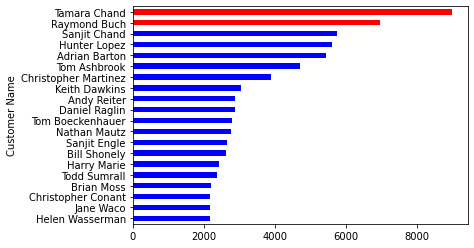

In [24]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64


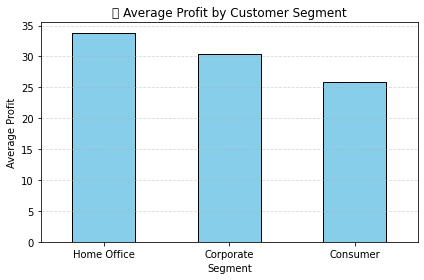

In [25]:
import matplotlib.pyplot as plt

# Group by Segment and calculate average profit
avg_profit_by_segment = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

# Display
print(avg_profit_by_segment)

# Optional: Plot
avg_profit_by_segment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('💰 Average Profit by Customer Segment')
plt.ylabel('Average Profit')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# -Can we apply Pareto principle to customers and Profit ?

In [26]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [27]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [28]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

# Top 30% occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important !

#  -Sales by Categories

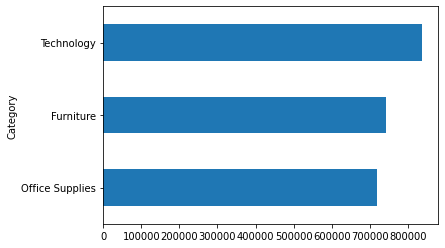

In [29]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh();

# -Profit by Categories

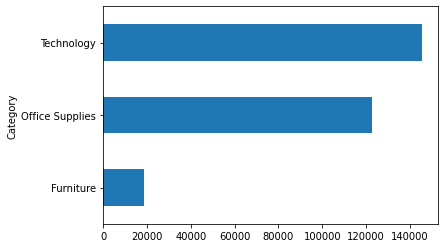

In [30]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh();

# Profitability by category

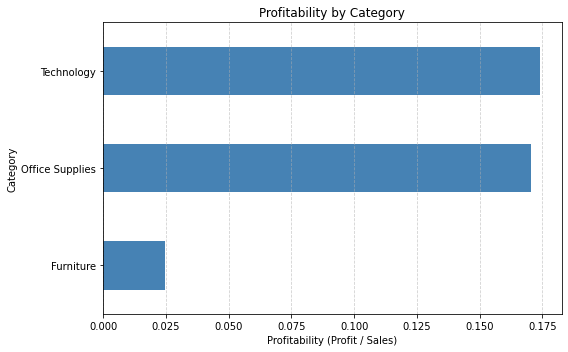

In [31]:
import matplotlib.pyplot as plt

# Step 1: Group by Category and calculate total Sales and Profit
category_metrics = df.groupby('Category')[['Sales', 'Profit']].sum()

# Step 2: Calculate profitability
category_metrics['Profitability'] = category_metrics['Profit'] / category_metrics['Sales']

# Step 3: Plot the profitability as a horizontal bar chart
ax = category_metrics['Profitability'].plot(
    kind='barh',
    color='steelblue',  # or use 'blue'
    figsize=(8, 5),
    title='Profitability by Category'
)

# Step 4: Add labels and formatting
plt.xlabel('Profitability (Profit / Sales)')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# -Sub Categories by Sales

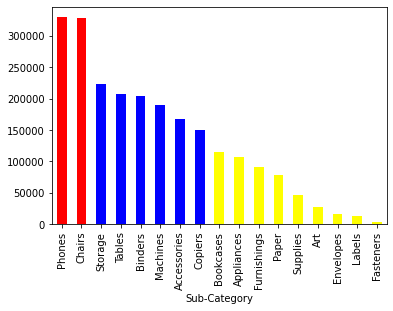

In [32]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

# -Sub Categories by Profit

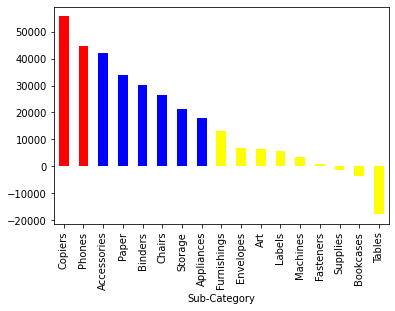

In [33]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

# On one hand,we can incrase the quantity of those high profitability sub-catigories for bigger profit

# On the other hand,"Tables "is cosing a big loss !

# Things that can lead to the loss:heavy discount,high shipping cost... Let's have a look

# --Brainstorm:how do we compare discount ?

In [34]:
# Weighted discount for "Tables" sub-category
tables_df = df[df['Sub-Category'] == 'Tables']
weighted_discount_tables = (tables_df['Discount'] * tables_df['Sales']).sum() / tables_df['Sales'].sum()

# Weighted discount for the entire dataset
weighted_discount_total = (df['Discount'] * df['Sales']).sum() / df['Sales'].sum()

print(f"Tables Weighted Discount - Tables: {weighted_discount_tables:.3f}")
print(f"Total Weighted Discount - Total:  {weighted_discount_total:.3f}")


Tables Weighted Discount - Tables: 0.214
Total Weighted Discount - Total:  0.140


# --Heavy discount for "Tables"

In [35]:
# Shipping mode distribution for Tables
tables_df = df[df['Sub-Category'] == 'Tables']
tables_shipping = tables_df['Ship Mode'].value_counts(normalize=True) * 100

# Shipping mode distribution for total dataset
total_shipping = df['Ship Mode'].value_counts(normalize=True) * 100

# Combine into one DataFrame for easy comparison
shipping_compare = pd.DataFrame({
    'Tables (%)': tables_shipping,
    'All Products (%)': total_shipping
}).fillna(0)

print(shipping_compare)


                Tables (%)  All Products (%)
Standard Class   59.561129         59.715829
Second Class     19.122257         19.461677
First Class      14.733542         15.389234
Same Day          6.583072          5.433260


# No much difference between ship mode of "Tables" and Overall  products


# --This brings a new question,does bigger discount connect to lower profitability?


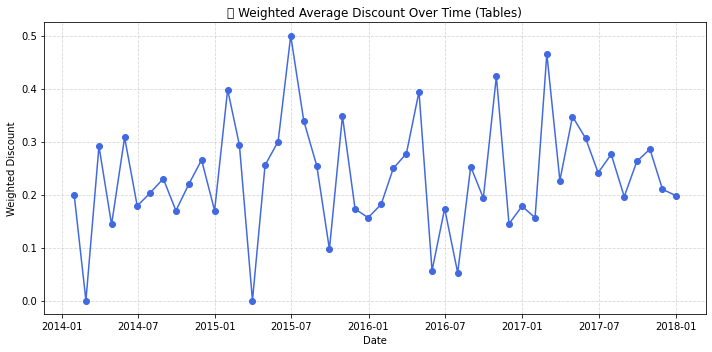

In [36]:
import matplotlib.pyplot as plt

# Make sure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter for Tables
tables_df = df[df['Sub-Category'] == 'Tables'].copy()

# Set date index
tables_df.set_index('Order Date', inplace=True)

# Define function for weighted average
def weighted_avg_discount(group):
    return (group['Discount'] * group['Sales']).sum() / group['Sales'].sum()

# Resample monthly and apply weighted average
# Fix: resample returns a Series
weighted_discount_ts = tables_df.resample('M').apply(weighted_avg_discount)

# Plot directly
plt.figure(figsize=(10, 5))
plt.plot(weighted_discount_ts.index, weighted_discount_ts, color='royalblue', marker='o')
plt.title('📉 Weighted Average Discount Over Time (Tables)')
plt.xlabel('Date')
plt.ylabel('Weighted Discount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


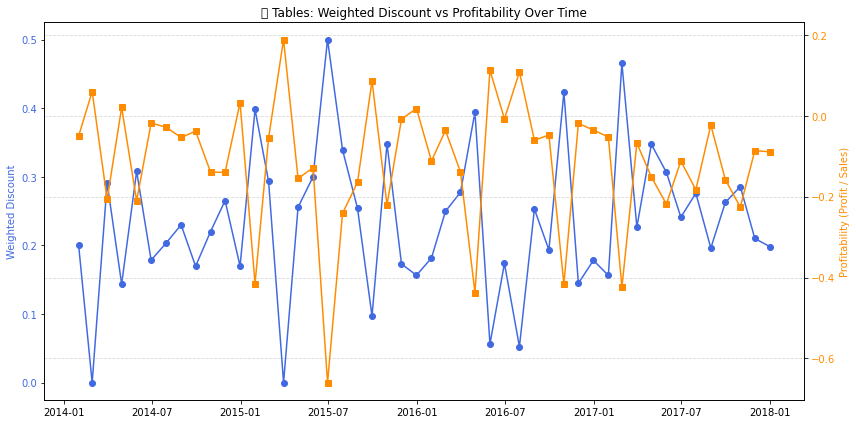

In [37]:
import matplotlib.pyplot as plt

# Ensure datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter Tables only
tables_df = df[df['Sub-Category'] == 'Tables'].copy()
tables_df.set_index('Order Date', inplace=True)

# Calculate weighted discount over time
def weighted_discount(g):
    return (g['Discount'] * g['Sales']).sum() / g['Sales'].sum()

# Calculate profitability over time
def profitability(g):
    return g['Profit'].sum() / g['Sales'].sum()

# Resample monthly
discount_series = tables_df.resample('M').apply(weighted_discount)
profitability_series = tables_df.resample('M').apply(profitability)

# Plot both
fig, ax1 = plt.subplots(figsize=(12, 6))

# Weighted Discount (left Y-axis)
ax1.plot(discount_series.index, discount_series, color='royalblue', label='Weighted Discount', marker='o')
ax1.set_ylabel('Weighted Discount', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Profitability (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(profitability_series.index, profitability_series, color='darkorange', label='Profitability', marker='s')
ax2.set_ylabel('Profitability (Profit / Sales)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Title and layout
plt.title('🪑 Tables: Weighted Discount vs Profitability Over Time')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [38]:
import pandas as pd

# Filter for Tables sub-category
tables_df = df[df['Sub-Category'] == 'Tables']

# Check the correlation
correlation = tables_df['Discount'].corr(tables_df['Profitability'])

print("Correlation between Discount and Profitability (Tables):", correlation)


Correlation between Discount and Profitability (Tables): -0.9295894490262057


# Brilliant ! this is what we expected

# --A very strong negative linear relationship!

# Same accross different sub-catigories?

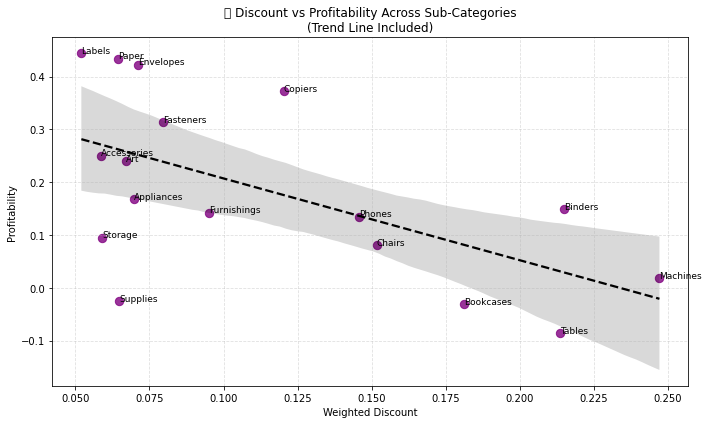

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Sub-Category and compute metrics
grouped = df.groupby('Sub-Category').apply(
    lambda g: pd.Series({
        'Weighted Discount': (g['Discount'] * g['Sales']).sum() / g['Sales'].sum(),
        'Profitability': g['Profit'].sum() / g['Sales'].sum()
    })
).reset_index()

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=grouped,
    x='Weighted Discount',
    y='Profitability',
    scatter_kws={'s': 70, 'color': 'purple'},
    line_kws={'color': 'black', 'linestyle': '--'}
)

# Annotate sub-category names
for _, row in grouped.iterrows():
    plt.text(row['Weighted Discount'], row['Profitability'], row['Sub-Category'], fontsize=9)

plt.title('📊 Discount vs Profitability Across Sub-Categories\n(Trend Line Included)')
plt.xlabel('Weighted Discount')
plt.ylabel('Profitability')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


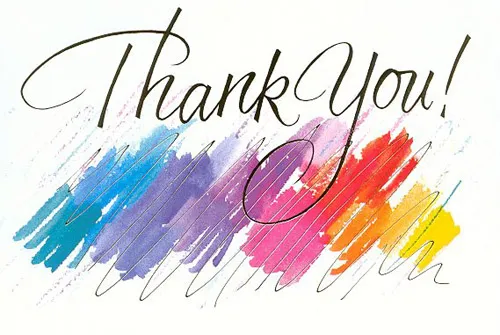
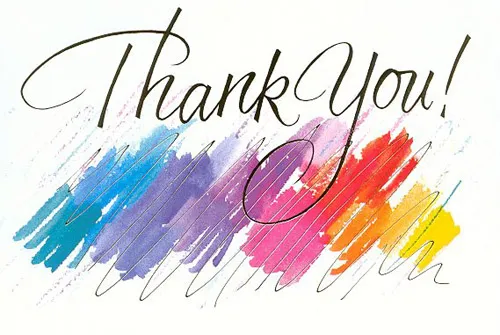

---

### 💬 Feedback Welcome!

If you noticed any mistakes, unclear logic, or areas for improvement, feel free to leave a comment. I’d love to hear your thoughts and suggestions to make this notebook even better!


# Stay tunned ! The second notebook will be finished soon !

<span style="color:#FFA500; font-size:18px;"><strong>👍 Leave an upvote if you learnt something new here!</strong></span>
